# Farm-Field relationship

The structure and changes in structure of fields, i.e., size, shape and number of fields within an agricultural landscape boundary are influenced by factors which can be external or farm-related. The external factors include natural distribution of ecosystems (e.g., rivers, forests, etc.) as well as institutional processes such as placements of infrastructures (roads, buildings, etc.) and regulations which may, directly or indirectly through farmer's decision, influence field structures. Ecosystems and infrastructures will strongly influence the structure and change in structures of fields proximate to them while regulations, for example, change in a biodiversity policy may cause field structures to change so as to increase ecosystem diversity and the broader landscape configuration. Therefore, the influence of external factors on fields can be considered to indirectly emerge in the process of these external factors shaping landscape configuration. On the other hand, farm-related factors such as farm specialisation, change in management technique, technology usage, farm consolidation and fragmentation directly involve or lead to change field structure. So much so that concepts describing field structure e.g., field size are sometimes assumed to be implied from concepts such as farm size which describe farm structure. 

Our third research question thus seeks to examine how farm size change as an aspect of farm structural change relates to field size change. That is, is it correct to imply a positive relationship between farm size and field size change as often implied in literature? We employ the same 12 year panel data of 10km2-grid level aggregates of field as employed in research questions one and two, and data containing 2010, 2016 and 2020 regional statistics of total number of  farms in a region, total agricultural area occupied by all farms (i.e., total farm size) in the region as well as disaggregation of these two metrics by farm size classes. For field size, we identify the grid average field size variable as relevant. For farm size, firstly, we compute regional average farm size by dividing total farm size by number of farms. We also compute tranformed variables necessary for modelling. Secondly, since this data only contains cross sections for 2010, 2016 and 2020 while field data spans 12 years (2012 to 2023), we used the available farm cross-sections as proxy for missing years as follows:
2010 cross section as proxy for 2012 so as to harmonize the baseline year of the field and farm data sets, 2016 cross section as cross section for 2016 and proxy for years following 2012 but preceding 2016, and 2020 as cross section for 2020 and proxy for missing years from 2017 to 2023. Lastly, we merge the field and farm datasets on regions common to both data but mapping yearly regional average farm size to grids for harmonization and spatial comparison with the field variable.

Although either of this variable could be the dependent or independent variable, we set field size change as dependent variable following the assumption that farm structural change impacts field structure. Therefore, we state the following hypotheses:

H0: Field size change does not relate to farm size change.
H1: There is a positive relationship between field and farm size change.

We use the following static log-log Ordinary Least Squares regression model to test the hypotheses.<br>
Log(AFiS_it) = B0 + B1*Log(AFaS_it) + α_i + ε_it   ... (1)

Where:<br>
AFiS = average field size,<br>
AFaS = average farm size,<br>
B0 = intercept,<br>
B1 = slope<br>
ε = error term for grid cell i and time t<br>
α_i is a dummy variable of grid cell which characteristics that vary between grid cells but do not change over the studied time period, e.g., grid cell location and predominant land-use in the grid cell location

(Bayesian Note): For Bayesian modelling, remove B0 from model 1 to allow entity parameter to implicitly capture common intercept and entity deviation.

Since the data employed is a panel data, the logarithm transformation applied in the model allows to interpret the relationship in terms of percentage changes as though estimating the elasticity of field size relative to farm size.

Additionaly, we explored a first difference growth model which allows to learn how change in rate of change of farm size relates to change rate of field size.<br>
Δ(AFiS_it)  = BΔ(AFiS_it) + ε_it   ... (2)


**Other specification of model 1 using computed variable yearly differences instead of logs.**
We test if there is a proportionate positive relationship between farm size change and field size change.

We empirically estimate the following model to test the hypothesis:  
∆[AFiS_it]=β_0+β_1 ∆[AFaS_it]+α_i+ε_it  ... (m1)

or

∆[AFiS_it]=α_i+β_1 ∆[AFaS_it]++ε_it     ... (m2)


AFiS_it is a random variable of the average field size in a grid cell in time t and ∆[AFiS_it] is the magnitude for which AFiS_i in year t differs from AFiS_i in year t - 1.
AFaS_it is a random variable of the average farm size in a grid cell in time t and ∆[AFaS_it] is the magnitude for which AFaS_i in year t differs from AFaS_i in year t - 1.
For ∆[AFiS_it], grid cells have unique values because we were able to compute AFiS_it and ∆[AFiS_it] from field level polygons for all districts of Lower Saxony. However, grid cells belonging to X districts all take the district ∆[AFaS_it] averages as values because we used district aggregated farm data.

.

In m1 which we use for frequentist linear models, β_0 provides a common intercept and α_i provides individual deviations from this intercept for all gridcells. Therefore actual intercept of each cell can be computed by taking the values from the intercept + α_i value.

In m2, common intercept is computed implicitly for Bayesian application.


***

__Import packages__

***

In [1]:
# Required imports
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import openpyxl
import seaborn as sns
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS

import arviz as az
import jax 
from jax import random
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
import numpyro.optim as optim
from numpyro.infer import SVI, Trace_ELBO
from numpyro.infer.autoguide import AutoLaplaceApproximation
from numpyro.diagnostics import print_summary

# Set seed for reproducibility
rng_key = random.PRNGKey(1)
np.random.seed(0)

***

__*Preparation*: Import and process farm data__

***

In [2]:
os.chdir("C:/Users/aladesuru/Documents/DataAnalysis/Lab/Niedersachsen")
# Load the farm file into a DataFrame
farmdata = pd.read_excel("data/raw/farmdata/farmNieder_corre.xlsx")
farmdata.info()
farmdata.head()

# count unique years in the dataset
farmdata['year'].nunique()
farmdata['LANDKREIS'].nunique()

#check for missing values
farmdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LK         1104 non-null   int64  
 1   LANDKREIS  1104 non-null   object 
 2   klasse     1104 non-null   object 
 3   year       1104 non-null   int64  
 4   anzahl     1097 non-null   float64
 5   LF_ha      1066 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 51.9+ KB


LK            0
LANDKREIS     0
klasse        0
year          0
anzahl        7
LF_ha        38
dtype: int64

In [3]:
#subset the data for where klasse is Ingesamt
farmdata_ge = farmdata[farmdata['klasse'] == 'Insgesamt']
print('shape all',farmdata_ge.shape)


shape all (138, 6)


In [4]:
# Convert column dtypes to appropriate types
farmdata_ge['LK'] = farmdata_ge['LK'].astype(object)

C:\Users\aladesuru\AppData\Local\Temp\ipykernel_15440\3983343443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farmdata_ge['LK'] = farmdata_ge['LK'].astype(object)


In [5]:
# create a new column 'LF_mean' which is 'LF_ha' divided by 'anzahl'
farmdata_ge['LF_mean'] = farmdata_ge['LF_ha'] / farmdata_ge['anzahl']
farmdata_ge.head()

C:\Users\aladesuru\AppData\Local\Temp\ipykernel_15440\3219583224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farmdata_ge['LF_mean'] = farmdata_ge['LF_ha'] / farmdata_ge['anzahl']


,LK,LANDKREIS,klasse,year,anzahl,LF_ha,LF_mean
0,0,Niedersachsen,Insgesamt,2010,41271.0,2577017.0,62.441351
8,101,Stadt Braunschweig (kreisfrei),Insgesamt,2010,77.0,6661.0,86.506494
16,102,Stadt Salzgitter (kreisfrei),Insgesamt,2010,104.0,10580.0,101.730769
24,103,Stadt Wolfsburg (kreisfrei),Insgesamt,2010,94.0,8396.0,89.319149
32,151,Gifhorn,Insgesamt,2010,896.0,75710.0,84.497768


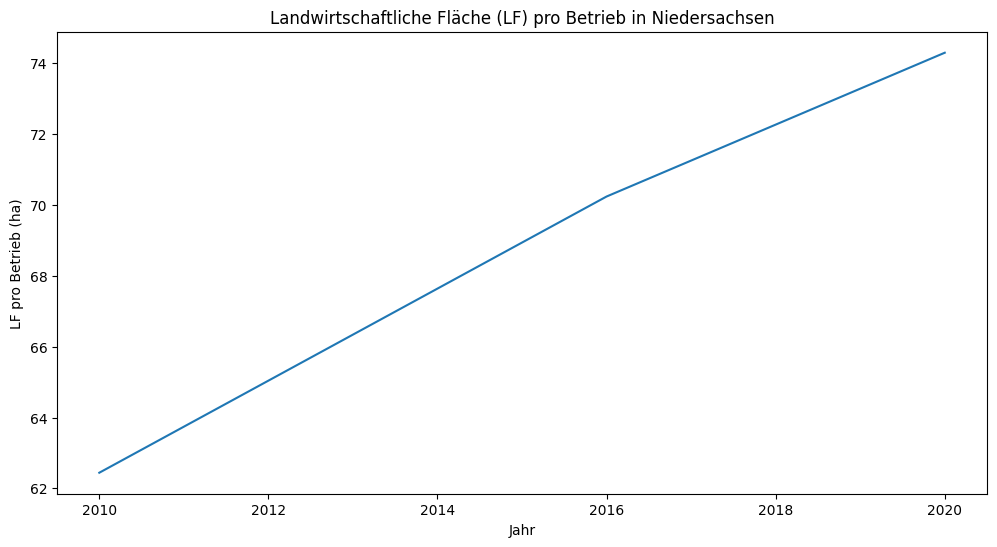

In [6]:
#subset the data for total niedersachsen
farmdata_nieder = farmdata_ge[farmdata_ge['LK'] == 0]
farmdata_nieder

# make a line plot of LF_mean over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=farmdata_nieder, x='year', y='LF_mean')
plt.title('Landwirtschaftliche Fläche (LF) pro Betrieb in Niedersachsen')
plt.xlabel('Jahr')
plt.ylabel('LF pro Betrieb (ha)')
plt.show()

In [7]:
# drop rows where LK = 0 i.e. Niedersachsen as a whole
farmdata_gecop = farmdata_ge.copy()
farmdata_ge = farmdata_gecop[farmdata_gecop['LK'] != 0]
print('shape without whole niedersachsen rows',farmdata_ge.shape)
farmdata_ge.info()
farmdata_ge['LANDKREIS'].nunique()

shape without whole niedersachsen rows (135, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 8 to 1096
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LK         135 non-null    object 
 1   LANDKREIS  135 non-null    object 
 2   klasse     135 non-null    object 
 3   year       135 non-null    int64  
 4   anzahl     135 non-null    float64
 5   LF_ha      135 non-null    float64
 6   LF_mean    135 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.4+ KB


45

In [8]:
# Create a copy of the original dictionary to avoid altering the original data
farmdata_ge_ext = farmdata_ge.copy()

# Ensure the data is sorted by 'LANDKREIS'' and 'year'
farmdata_ge_ext.sort_values(by=['LANDKREIS', 'year'], inplace=True)
numeric_columns = farmdata_ge_ext.select_dtypes(include='number').columns

# Create a dictionary to store the new columns
new_columns = {}

# Calculate yearly difference for numeric columns and store in the dictionary
for col in numeric_columns:
    new_columns[f'{col}_yearly_diff'] = farmdata_ge_ext.groupby('LANDKREIS')[col].diff().fillna(0)
# Calculate yearly relative difference for numeric columns and store in the dictionary
    new_columns[f'{col}_yearly_percdiff'] = (farmdata_ge_ext.groupby('LANDKREIS')[col].diff() / farmdata_ge_ext.groupby('LANDKREIS')[col].shift(1)).fillna(0) * 100

# Concatenate the new columns to the original DataFrame all at once
new_columns_df = pd.DataFrame(new_columns)
farmdata_ge_ydiff = pd.concat([farmdata_ge_ext, new_columns_df], axis=1)
farmdata_ge_ydiff.head()

,LK,LANDKREIS,klasse,year,anzahl,LF_ha,LF_mean,year_yearly_diff,year_yearly_percdiff,anzahl_yearly_diff,anzahl_yearly_percdiff,LF_ha_yearly_diff,LF_ha_yearly_percdiff,LF_mean_yearly_diff,LF_mean_yearly_percdiff
272,451,Ammerland,Insgesamt,2010,1008.0,43611.0,43.264881,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
640,451,Ammerland,Insgesamt,2016,841.0,42654.0,50.718193,6.0,0.298507,-167.0,-16.567460,-957.0,-2.194400,7.453312,17.227163
1008,451,Ammerland,Insgesamt,2020,827.0,42873.0,51.841596,4.0,0.198413,-14.0,-1.664685,219.0,0.513434,1.123404,2.214991
280,452,Aurich,Insgesamt,2010,1431.0,80236.0,56.069881,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
648,452,Aurich,Insgesamt,2016,1315.0,82643.0,62.846388,6.0,0.298507,-116.0,-8.106219,2407.0,2.999900,6.776507,12.085823


In [9]:
fdg_ext = farmdata_ge_ydiff.copy()

fdg_ext['log_AFaS'] = np.log(fdg_ext['LF_mean'])

# sort by LANDKREIS and year
fdg_ext = fdg_ext.sort_values(by=['LANDKREIS', 'year'])

# compute yearly differences for the log_LF_mean column
fdg_ext['d_log_AFaS'] = fdg_ext.groupby('LANDKREIS')['log_AFaS'].diff().fillna(0)

# check the first 10 rows of the dataset
fdg_ext.head(10)

,LK,LANDKREIS,klasse,year,anzahl,LF_ha,LF_mean,year_yearly_diff,year_yearly_percdiff,anzahl_yearly_diff,anzahl_yearly_percdiff,LF_ha_yearly_diff,LF_ha_yearly_percdiff,LF_mean_yearly_diff,LF_mean_yearly_percdiff,log_AFaS,d_log_AFaS
272,451,Ammerland,Insgesamt,2010,1008.0,43611.0,43.264881,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.767341,0.000000
640,451,Ammerland,Insgesamt,2016,841.0,42654.0,50.718193,6.0,0.298507,-167.0,-16.567460,-957.0,-2.194400,7.453312,17.227163,3.926285,0.158943
1008,451,Ammerland,Insgesamt,2020,827.0,42873.0,51.841596,4.0,0.198413,-14.0,-1.664685,219.0,0.513434,1.123404,2.214991,3.948193,0.021908
280,452,Aurich,Insgesamt,2010,1431.0,80236.0,56.069881,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4.026599,0.000000
648,452,Aurich,Insgesamt,2016,1315.0,82643.0,62.846388,6.0,0.298507,-116.0,-8.106219,2407.0,2.999900,6.776507,12.085823,4.140693,0.114095
1016,452,Aurich,Insgesamt,2020,1219.0,82252.0,67.474979,4.0,0.198413,-96.0,-7.300380,-391.0,-0.473119,4.628592,7.364929,4.211757,0.071063
144,351,Celle,Insgesamt,2010,663.0,51166.0,77.173454,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4.346056,0.000000
512,351,Celle,Insgesamt,2016,632.0,52227.0,82.637658,6.0,0.298507,-31.0,-4.675716,1061.0,2.073643,5.464204,7.080419,4.414465,0.068410
880,351,Celle,Insgesamt,2020,595.0,51610.0,86.739496,4.0,0.198413,-37.0,-5.854430,-617.0,-1.181381,4.101838,4.963642,4.462909,0.048444
288,453,Cloppenburg,Insgesamt,2010,2010.0,93577.0,46.555721,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.840650,0.000000


In [10]:
# drop columns LK, klasse, year_yearly_diff, year_yearly_percdiff  
fdg_ext = fdg_ext.drop(columns=['LK', 'klasse', 'year_yearly_diff', 'year_yearly_percdiff'])
# sort by year
fdg_ext = fdg_ext.sort_values(by='year').reset_index(drop=True)
fdg_ext.head()

,LANDKREIS,year,anzahl,LF_ha,LF_mean,anzahl_yearly_diff,anzahl_yearly_percdiff,LF_ha_yearly_diff,LF_ha_yearly_percdiff,LF_mean_yearly_diff,LF_mean_yearly_percdiff,log_AFaS,d_log_AFaS
0,Ammerland,2010,1008.0,43611.0,43.264881,0.0,0.0,0.0,0.0,0.0,0.0,3.767341,0.0
1,Aurich,2010,1431.0,80236.0,56.069881,0.0,0.0,0.0,0.0,0.0,0.0,4.026599,0.0
2,Celle,2010,663.0,51166.0,77.173454,0.0,0.0,0.0,0.0,0.0,0.0,4.346056,0.0
3,Cloppenburg,2010,2010.0,93577.0,46.555721,0.0,0.0,0.0,0.0,0.0,0.0,3.840650,0.0
4,Cuxhaven,2010,2070.0,134870.0,65.154589,0.0,0.0,0.0,0.0,0.0,0.0,4.176763,0.0


In [11]:
'''Since field data is from 2012 to 2023, for missing yearly data between 2010 and 2023,
let 2010 data be used for 2011 and 2012, 2016 data for 2013 to 2015, and 2020 data for 2017 to 2023'''
# Create a list to store all DataFrames
all_dfs = [fdg_ext]

# Define the years to copy data for
years_to_copy = {2010: range(2011, 2013), 2016: range(2013, 2016), 2020: list(range(2017, 2020)) + list(range(2021, 2024))}

# Loop through the years and create copies
for base_year, copy_years in years_to_copy.items():
    base_data = fdg_ext[fdg_ext['year'] == base_year].copy()
    for year in copy_years:
        df_copy = base_data.copy()
        df_copy['year'] = year
        all_dfs.append(df_copy)

# Concatenate all DataFrames
fdg_ext_all = pd.concat(all_dfs, ignore_index=True)

# Sort the DataFrame by year
fdg_ext_all = fdg_ext_all.sort_values(by='year').reset_index(drop=True)

# print unique years in the dataset
print(fdg_ext_all['year'].unique())

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [12]:
# drop rows for years 2010 and 2011 in df_farm since we now have 2012 which is a coherent baseyear with field data
fdg_ext_all = fdg_ext_all[fdg_ext_all["year"] > 2011]

# print unique years in the dataset
print(fdg_ext_all['year'].unique())

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [13]:
# drop LANDKREIS "Stadt Oldenburg (Oldb) (kreisfrei)" because this is missing in field data
fdg_ext_all = fdg_ext_all[fdg_ext_all['LANDKREIS'] != 'Stadt Oldenburg (Oldb) (kreisfrei)']
fdg_ext_all['LANDKREIS'].nunique()

44

***

__*Preparation*: Import field data and merge to farm data__

***

In [14]:
from src.analysis.desc import gridgdf_desc as gd

# %% load data
_, gridgdf = gd.silence_prints(gd.create_gridgdf)
# I always want to load gridgdf and process clean gridgdf separately so I can have uncleeaned data for comparison or sensitivity analysis
gridgdf_cl, _ = gd.clean_gridgdf(gridgdf)

2025-02-26 11:55:11,754 - INFO - Unique CELLCODES with fields < 300: 62
2025-02-26 11:55:11,794 - INFO - Final unique CELLCODES in outliers: 57


In [15]:
gridgdf_cl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CELLCODE                     6156 non-null   object  
 1   year                         6156 non-null   int32   
 2   LANDKREIS                    6156 non-null   object  
 3   fields                       6156 non-null   int64   
 4   group_count                  6156 non-null   int64   
 5   fsm2_sum                     6156 non-null   float64 
 6   fsha_sum                     6156 non-null   float64 
 7   peri_sum                     6156 non-null   float64 
 8   par_sum                      6156 non-null   float64 
 9   mfs_ha                       6156 non-null   float64 
 10  mperi                        6156 non-null   float64 
 11  mpar                         6156 non-null   float64 
 12  medfs_ha                     6156 non-null   float64 


In [16]:
gridgdf_clc = gridgdf_cl.copy()  # Ensure it's a valid copy

# drop geometry column
gridgdf_clc = gridgdf_clc.drop(columns='geometry')


In [17]:
# yearly differences for log_medfs_ha
#create log columsn for medfs_ha
gridgdf_clc['log_AFiS'] = np.log(gridgdf_clc['medfs_ha'])

gridgdf_clc.sort_values(by=['CELLCODE', 'year'], inplace=True)

gridgdf_clc['d_log_AFiS'] = gridgdf_clc.groupby('CELLCODE')['log_AFiS'].diff().fillna(0)

# check the first 10 rows of the dataset
gridgdf_clc[['CELLCODE', 'year', 'medfs_ha', 'medfs_ha_yearly_percdiff', 'log_AFiS', 'd_log_AFiS']].head(10)

,CELLCODE,year,medfs_ha,medfs_ha_yearly_percdiff,log_AFiS,d_log_AFiS
0,10kmE410N326,2012,2.385932,0.000000,0.869590,0.000000
1,10kmE410N326,2013,2.350738,-1.475078,0.854729,-0.014861
2,10kmE410N326,2014,2.223233,-5.424039,0.798962,-0.055767
3,10kmE410N326,2015,2.217493,-0.258193,0.796377,-0.002585
4,10kmE410N326,2016,2.227422,0.447779,0.800845,0.004468
5,10kmE410N326,2017,2.230990,0.160203,0.802446,0.001601
6,10kmE410N326,2018,2.275191,1.981190,0.822064,0.019618
7,10kmE410N326,2019,2.320561,1.994146,0.841809,0.019745
8,10kmE410N326,2020,2.300931,-0.845908,0.833314,-0.008495
9,10kmE410N326,2021,2.316277,0.666930,0.839961,0.006647


In [18]:
# drop columns and Landkreise not in farm data from gridgdf_cl
# potentials include 'geometry','fsha_sum', 'fields', 'fields_yearly_percdiff', 'fields_yearly_diff','mfs_ha',  
#'medfs_ha_yearly_diff', 'fsha_sum_yearly_diff', 'fsha_sum_yearly_percdiff', 'mfs_ha_yearly_diff', 'mfs_ha_yearly_percdiff',
# Specify the columns to keep
columns_to_keep = [
    'LANDKREIS', 'CELLCODE', 'year', 'medfs_ha', 'medfs_ha_yearly_percdiff', 'log_AFiS', 'd_log_AFiS'
]

# Drop all other columns
field_grids = gridgdf_clc[columns_to_keep]

field_grids = field_grids[~field_grids["LANDKREIS"].isin(["Küstenmeer Region Lüneburg", "Küstenmeer Region Weser-Ems"])]
print('total regions in field data', field_grids['LANDKREIS'].nunique())

#rest index
field_grids = field_grids.reset_index(drop=True)
field_grids.info()

total regions in field data 44
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036 entries, 0 to 6035
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LANDKREIS                 6036 non-null   object 
 1   CELLCODE                  6036 non-null   object 
 2   year                      6036 non-null   int32  
 3   medfs_ha                  6036 non-null   float64
 4   medfs_ha_yearly_percdiff  6036 non-null   float64
 5   log_AFiS                  6036 non-null   float64
 6   d_log_AFiS                6036 non-null   float64
dtypes: float64(4), int32(1), object(2)
memory usage: 306.6+ KB


In [19]:
# %%
# Standardize 'LANDKREIS' column in both DataFrames
df_farm = fdg_ext_all.copy()
df_field = field_grids.copy()

df_field["LANDKREIS"] = df_field["LANDKREIS"].str.strip()
df_farm["LANDKREIS"] = df_farm["LANDKREIS"].str.strip()

# Get unique LANDKREIS values from both DataFrames
farm_landkreise = set(df_farm["LANDKREIS"].unique())
field_landkreise = set(df_field["LANDKREIS"].unique())

# Check if they are the same
if farm_landkreise == field_landkreise:
    print("✅ LANDKREIS values in df_farm and df_field match exactly!")
else:
    print("❌ There are differences in LANDKREIS values between the two DataFrames.")
    
    # Find mismatched values
    only_in_farm = farm_landkreise - field_landkreise
    only_in_field = field_landkreise - farm_landkreise
    
    print(f"⚠️ Present in df_farm but missing in df_field: {only_in_farm}")
    print(f"⚠️ Present in df_field but missing in df_farm: {only_in_field}")


❌ There are differences in LANDKREIS values between the two DataFrames.
⚠️ Present in df_farm but missing in df_field: {'Hannover,Region'}
⚠️ Present in df_field but missing in df_farm: {'Region Hannover'}


In [20]:
# there is inconsistency in naming Hannover region. Therefore:
df_farm["LANDKREIS"] = df_farm["LANDKREIS"].replace("Hannover,Region", "Region Hannover")

# Get unique LANDKREIS values from both DataFrames
farm_landkreise = set(df_farm["LANDKREIS"].unique())
field_landkreise = set(df_field["LANDKREIS"].unique())

# Check if they are the same
if farm_landkreise == field_landkreise:
    print("✅ LANDKREIS values in df_farm and df_field match exactly!")
else:
    print("❌ There are differences in LANDKREIS values between the two DataFrames.")
    
    # Find mismatched values
    only_in_farm = farm_landkreise - field_landkreise
    only_in_field = field_landkreise - farm_landkreise
    
    print(f"⚠️ Present in df_farm but missing in df_field: {only_in_farm}")
    print(f"⚠️ Present in df_field but missing in df_farm: {only_in_field}")


✅ LANDKREIS values in df_farm and df_field match exactly!


In [21]:
df_farm.info()
df_field.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 90 to 629
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LANDKREIS                528 non-null    object 
 1   year                     528 non-null    int64  
 2   anzahl                   528 non-null    float64
 3   LF_ha                    528 non-null    float64
 4   LF_mean                  528 non-null    float64
 5   anzahl_yearly_diff       528 non-null    float64
 6   anzahl_yearly_percdiff   528 non-null    float64
 7   LF_ha_yearly_diff        528 non-null    float64
 8   LF_ha_yearly_percdiff    528 non-null    float64
 9   LF_mean_yearly_diff      528 non-null    float64
 10  LF_mean_yearly_percdiff  528 non-null    float64
 11  log_AFaS                 528 non-null    float64
 12  d_log_AFaS               528 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 57.8+ KB
<class 'pandas.core.frame

In [22]:
# merge df_farm and df_field using the LANDKREIS and year columns, inner join
farm_field = df_farm.merge(df_field, on=["LANDKREIS", "year"])

farm_field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036 entries, 0 to 6035
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LANDKREIS                 6036 non-null   object 
 1   year                      6036 non-null   int64  
 2   anzahl                    6036 non-null   float64
 3   LF_ha                     6036 non-null   float64
 4   LF_mean                   6036 non-null   float64
 5   anzahl_yearly_diff        6036 non-null   float64
 6   anzahl_yearly_percdiff    6036 non-null   float64
 7   LF_ha_yearly_diff         6036 non-null   float64
 8   LF_ha_yearly_percdiff     6036 non-null   float64
 9   LF_mean_yearly_diff       6036 non-null   float64
 10  LF_mean_yearly_percdiff   6036 non-null   float64
 11  log_AFaS                  6036 non-null   float64
 12  d_log_AFaS                6036 non-null   float64
 13  CELLCODE                  6036 non-null   object 
 14  medfs_ha

In [23]:
farm_field['LANDKREIS'].nunique()

44

In [24]:
# Get unique LANDKREIS values from both DataFrames
farm_landkreise = set(df_farm["LANDKREIS"].unique())
field_landkreise = set(df_field["LANDKREIS"].unique())
farm_field_landkreise = set(farm_field["LANDKREIS"].unique())

# Check if they are the same
if farm_landkreise == field_landkreise == farm_field_landkreise:
    print("✅ LANDKREIS values in df_farm, df_field and farm_field match exactly!")
else:
    print("❌ There are differences in LANDKREIS values between the two DataFrames.")
    
    # Find mismatched values
    only_in_farm = farm_landkreise - field_landkreise - farm_field_landkreise
    only_in_field = field_landkreise - farm_landkreise - farm_field_landkreise
    only_in_farm_field = farm_field_landkreise - field_landkreise - farm_landkreise
    
    print(f"⚠️ Present in df_farm but missing in df_field and farm_field: {only_in_farm}")
    print(f"⚠️ Present in df_field but missing in df_farm and farm_field: {only_in_field}")
    print(f"⚠️ Present in farm_field but missing in df_farm and df_field: {only_in_farm_field}")
    
    

✅ LANDKREIS values in df_farm, df_field and farm_field match exactly!


In [25]:
farm_field['year'].nunique()

12

***
# Testing Relationship

***

## 1. Correlation test and plot

**First, lets see the correlation plot of farm size and field size**
It helps to check this with log and non-log data so as to examine the difference before proceeding. Ideally, log should be equivalent to proportionate or percentage changes

Correlation coefficient between log_AFaS and log_AFiS: 0.11858553817778507
Correlation coefficient between LF_mean and medfs_ha: 0.12932636551717552
Slope of regression line for log-transformed data: 0.13220027221433478
Slope of regression line for non-log-transformed data: 0.0036085714616466797


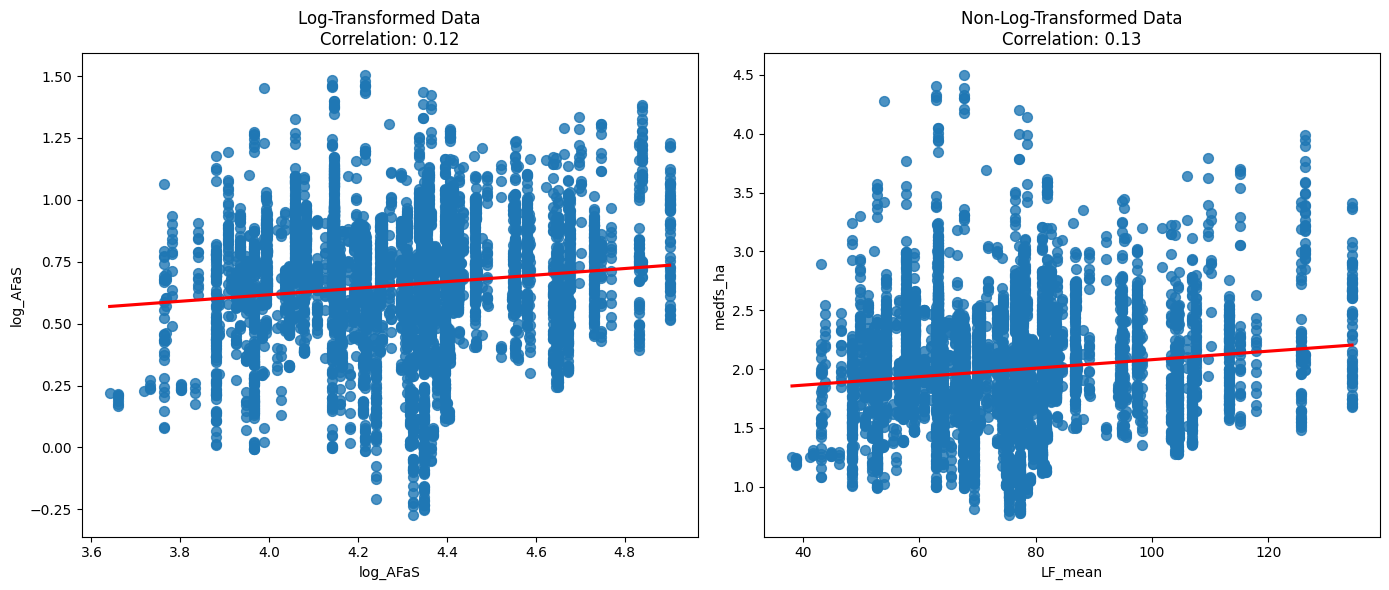

In [26]:
# Calculate the correlation coefficients
#1. for log-log model variables
corr_log = farm_field['log_AFaS'].corr(farm_field['log_AFiS'])
corr_non_log = farm_field['LF_mean'].corr(farm_field['medfs_ha']) #non-log counterparts

# Print the correlation coefficients
print(f"Correlation coefficient between log_AFaS and log_AFiS: {corr_log}")
print(f"Correlation coefficient between LF_mean and medfs_ha: {corr_non_log}")

# Fit linear regression models to get the slopes
model_log = smf.ols('log_AFiS ~ log_AFaS', data=farm_field).fit()
slope_log = model_log.params['log_AFaS']

model_non_log = smf.ols('medfs_ha ~ LF_mean', data=farm_field).fit()
slope_non_log = model_non_log.params['LF_mean']

# Print the slopes
print(f"Slope of regression line for log-transformed data: {slope_log}")
print(f"Slope of regression line for non-log-transformed data: {slope_non_log}")
# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for log-transformed data
sns.regplot(x='log_AFaS', y='log_AFiS', data=farm_field, ax=axes[0], ci=None, scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[0].set_title(f'Log-Transformed Data\nCorrelation: {corr_log:.2f}')
axes[0].set_xlabel('log_AFaS')
axes[0].set_ylabel('log_AFaS')

# Scatter plot for non-log-transformed data
sns.regplot(x='LF_mean', y='medfs_ha', data=farm_field, ax=axes[1], ci=None, scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[1].set_title(f'Non-Log-Transformed Data\nCorrelation: {corr_non_log:.2f}')
axes[1].set_xlabel('LF_mean')
axes[1].set_ylabel('medfs_ha')

plt.tight_layout()
plt.show()


In [27]:
# Group by 'year' and calculate the correlation between 'LF_mean' and 'medfs_ha' for each group
correlation_by_year = farm_field.groupby('year').apply(lambda x: x['LF_mean'].corr(x['medfs_ha']))
# Display the result
print("Correlation between LF_mean and medfs_ha grouped by year:")
print(correlation_by_year)

Correlation between LF_mean and medfs_ha grouped by year:
year
2012    0.190108
2013    0.226032
2014    0.221015
2015    0.206396
2016    0.182929
2017    0.189880
2018    0.142741
2019    0.103403
2020    0.082380
2021    0.036765
2022    0.009933
2023    0.039329
dtype: float64


C:\Users\aladesuru\AppData\Local\Temp\ipykernel_15440\249234312.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year = farm_field.groupby('year').apply(lambda x: x['LF_mean'].corr(x['medfs_ha']))


***

## Modelling

***

## Log-Log model of elasticity between field size and farm size

We specify a **scientific model** with fixed entity effects

$ Ln(AFiS_{it}) = \beta_0 + \beta_1Ln(AFaS_{it}) + \alpha_i + \alpha_t + \varepsilon_{it}$

where:  
- $ Ln(AFiS_{it}) $ = Change in average field size (AFiS)
- $ Ln(AFaS_{it}) $ = Change in average farm size (AFaS) 
- $ \beta_0 $ = Common intercept      
- $ \alpha_i $ = Entity and Time-fixed characteristics    
- $ \varepsilon_{it} $ = Error term 
- $ i $ = Individual grid cells
- $ t $ = Time


***
__*First*: Run a simple pooled OLS__

***
i.e., without fixed entity effect


$ Ln(AFiS_{it}) = \beta_0 + \beta_1Ln(AFaS_{it}) + \varepsilon_{it}$


In [39]:
# first run the regression without fixed effects using smf.ols or linearmodels
df = farm_field.copy()

df = df.set_index(["CELLCODE", "year"])
modA1 = smf.ols('log_AFiS ~ log_AFaS', data=df).fit()
print(modA1.summary())

                            OLS Regression Results                            
Dep. Variable:               log_AFiS   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     86.06
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           2.38e-20
Time:                        12:19:26   Log-Likelihood:                -354.78
No. Observations:                6036   AIC:                             713.6
Df Residuals:                    6034   BIC:                             727.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0880      0.061      1.433      0.1

In [ ]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import RandomEffects
from statsmodels.tools import add_constant

# Assuming df is already indexed by ['CELLCODE', 'year']
df = farm_field.copy()

df = df.set_index(["CELLCODE", "year"])
exog = add_constant(df[['log_AFaS']])
endog = df['log_AFiS']

pooled_model = PooledOLS(endog, exog)
pooled_res = pooled_model.fit()
print(pooled_res.summary)


                          PooledOLS Estimation Summary                          
Dep. Variable:               log_AFiS   R-squared:                        0.0141
Estimator:                  PooledOLS   R-squared (Between):              0.0156
No. Observations:                6036   R-squared (Within):              -0.0342
Date:                Wed, Feb 26 2025   R-squared (Overall):              0.0141
Time:                        12:48:54   Log-likelihood                   -354.78
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      86.064
Entities:                         503   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                  F(1,6034)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             86.064
                            

In [65]:
re_model = RandomEffects(endog, exog)
re_res = re_model.fit()
print(re_res.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:               log_AFiS   R-squared:                        0.0011
Estimator:              RandomEffects   R-squared (Between):             -0.0076
No. Observations:                6036   R-squared (Within):               0.0019
Date:                Wed, Feb 26 2025   R-squared (Overall):             -0.0073
Time:                        12:54:33   Log-likelihood                    9865.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.6539
Entities:                         503   P-value                           0.0099
Avg Obs:                       12.000   Distribution:                  F(1,6034)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             6.6539
                            

Run the LF_mean and Medfs_ha counterparts


$ AFiS_{it} = \beta_0 + \beta_1 AFaS_{it} + \varepsilon_{it}$


In [29]:
# first run the regression without fixed effects using smf.ols or linearmodels
df = farm_field.copy()

df = df.set_index(["CELLCODE", "year"])
mod = smf.ols('medfs_ha ~ LF_mean', data=df).fit()
mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.7185,0.028,61.721,0.000,1.664,1.773
LF_mean,0.0036,0.000,10.131,0.000,0.003,0.004


Interpreting this would mean one hectare increase in average farm size relates to 0.0036 ha increase in average field size.

It sounds more intuitive to use percentages i.e., the logs.

We see a positive relationship between farm size and field size in the log-log model

__*Compare Pooled and RE*__

In [67]:
from linearmodels.panel import compare

comparison = compare({'Pooled OLS': pooled_res, 'Random Effects': re_res})
print(comparison)

                 Model Comparison                 
                        Pooled OLS  Random Effects
--------------------------------------------------
Dep. Variable             log_AFiS        log_AFiS
Estimator                PooledOLS   RandomEffects
No. Observations              6036            6036
Cov. Est.               Unadjusted      Unadjusted
R-squared                   0.0141          0.0011
R-Squared (Within)         -0.0342          0.0019
R-Squared (Between)         0.0156         -0.0076
R-Squared (Overall)         0.0141         -0.0073
F-statistic                 86.064          6.6539
P-value (F-stat)            0.0000          0.0099
===================== ============ ===============
const                       0.0880          0.7889
                          (1.4330)        (15.070)
log_AFaS                    0.1322         -0.0306
                          (9.2770)       (-2.5795)
--------------------------------------------------

T-stats reported in parenthese

The estimate differ between the two models and the R-squared can be better. So, we try someething else.

***
__*Now*: We run FE models__

***



#### Entity fixed effects log-log model

In [30]:
#manually demean the variables for entity fixed effects
demeaned = farm_field.copy()


demeaned["X_demeaned"] = demeaned["log_AFaS"] - demeaned.groupby("CELLCODE")["log_AFaS"].transform("mean")
demeaned["Y_demeaned"] = demeaned["log_AFiS"] - demeaned.groupby("CELLCODE")["log_AFiS"].transform("mean")

In [42]:
# Define the variables
X = "X_demeaned"
Y = "Y_demeaned"

# Fit the OLS model
mod = smf.ols(f"{Y} ~ {X}", data=demeaned).fit()
#mod.summary()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:             Y_demeaned   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.24
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           0.000470
Time:                        12:21:05   Log-Likelihood:                 10134.
No. Observations:                6036   AIC:                        -2.026e+04
Df Residuals:                    6034   BIC:                        -2.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.469e-18      0.001  -5.97e-15      1.0

In [52]:
# directly use a linear model with fixed effects
df = farm_field.copy()

df = df.set_index(["CELLCODE", "year"])

# Define and fit the PanelOLS model with entity effects
fe_modelA2 = PanelOLS.from_formula("log_AFiS ~ 1 + log_AFaS + EntityEffects", data=df)

# Fit the model
fe_modelA2 = fe_modelA2.fit(cov_type='clustered', cluster_entity=True)

# Print the summary
print(fe_modelA2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               log_AFiS   R-squared:                        0.0020
Estimator:                   PanelOLS   R-squared (Between):             -0.0104
No. Observations:                6036   R-squared (Within):               0.0020
Date:                Wed, Feb 26 2025   R-squared (Overall):             -0.0101
Time:                        12:34:22   Log-likelihood                 1.013e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.226
Entities:                         503   P-value                           0.0008
Avg Obs:                       12.000   Distribution:                  F(1,5532)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             2.6158
                            

In [33]:
# we can extract the coefficients of each entity and calculate with intercept to get the actual entity coefficients
entity_effects = fe_modelA2.params.filter(like="C(CELLCODE)", axis=0)
# put in df
entity_effects = entity_effects.reset_index()
entity_effects.columns = ["CELLCODE", "entity_effect"]

# Calculate the actual entity coefficients
entity_effects["entity_coefficient"] = entity_effects["entity_effect"] + fe_modelA2.params["Intercept"]

# Edit values in the 'CELLCODE' column to only contain the last 13 characters
entity_effects['CELLCODE'] = entity_effects['CELLCODE'].str.slice(-13)
# Further edit values in the 'CELLCODE' column to retain only the first 12 characters
entity_effects['CELLCODE'] = entity_effects['CELLCODE'].str.slice(0, 12)

# Print the result
print(entity_effects.head())

Empty DataFrame
Columns: [CELLCODE, entity_effect, entity_coefficient]
Index: []


Entity effect of log-log change model shows a negative relationship between farm and field size

***
How about a time fixed effect model where we $\alpha_t $ represents entity invariant characteristics that change over time.
***

In [34]:
df = farm_field.copy()

df = df.set_index(["CELLCODE", "year"])
mod = PanelOLS.from_formula("log_AFiS ~ 1 + log_AFaS + TimeEffects", data=df)

fe_modelA3 = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
fe_modelA3.summary

Dep. Variable:,log_AFiS,R-squared:,0.0159
Estimator:,PanelOLS,R-squared (Between):,0.0156
No. Observations:,6036,R-squared (Within):,-0.0391
Date:,"Wed, Feb 26 2025",R-squared (Overall):,0.0140
Time:,11:55:18,Log-likelihood,-343.63
Cov. Estimator:,Clustered,,
,,F-statistic:,97.429
Entities:,503,P-value,0.0000
Avg Obs:,12.000,Distribution:,"F(1,6023)"
Min Obs:,12.000,,
Max Obs:,12.000,F-statistic (robust):,9.1158


For time effects, we see a flip in Beta1 sign from negative (in entity effect) to positive 

***
And Time & entity fixed effects?
***

We see a flip back to positive relationship between log_AFiS and log_AFaS

In [35]:
df = farm_field.copy()

df = df.set_index(["CELLCODE", "year"])
mod = PanelOLS.from_formula("log_AFiS ~ 1 + log_AFaS + EntityEffects + TimeEffects", data=df)

fe_modelA4 = mod.fit()
fe_modelA4.summary

Dep. Variable:,log_AFiS,R-squared:,0.0629
Estimator:,PanelOLS,R-squared (Between):,-0.1710
No. Observations:,6036,R-squared (Within):,-0.5356
Date:,"Wed, Feb 26 2025",R-squared (Overall):,-0.1821
Time:,11:56:13,Log-likelihood,1.051e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,370.61
Entities:,503,P-value,0.0000
Avg Obs:,12.000,Distribution:,"F(1,5521)"
Min Obs:,12.000,,
Max Obs:,12.000,F-statistic (robust):,370.61


***
Random effect?
***
Result is negative relation.


In [ ]:
from linearmodels.panel import RandomEffects
df = farm_field.copy()

df = df.set_index(["CELLCODE", "year"])
# RE model
model = RandomEffects.from_formula("log_AFiS ~ 1 + log_AFaS", data=df)

re_modelA = model.fit()

re_modelA.summary

Dep. Variable:,log_AFiS,R-squared:,0.0011
Estimator:,RandomEffects,R-squared (Between):,-0.0076
No. Observations:,6036,R-squared (Within):,0.0019
Date:,"Wed, Feb 26 2025",R-squared (Overall):,-0.0073
Time:,12:41:21,Log-likelihood,9865.8
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6.6539
Entities:,503,P-value,0.0099
Avg Obs:,12.000,Distribution:,"F(1,6034)"
Min Obs:,12.000,,
Max Obs:,12.000,F-statistic (robust):,6.6539


***
### Hausman test
***

Entity effects adjusted for entity clustering has the best Hausman P-value for a Fixed Effects model when we compare the entity effect model above fe_model2 and time effect model fe_model3 with Random Effect model.

Therefore, if we want to use FE, we use model 2 and otherwise use pooled OLS whose result is basically thesame as RE.

In [66]:
# Get FE and RE coefficients
b_fe = fe_modelA4.params
b_re = re_modelA.params

# Get variance-covariance matrices
V_fe = fe_modelA4.cov
V_re = re_modelA.cov

# Compute the difference in coefficients
b_diff = b_fe - b_re

# Compute the covariance difference
V_diff = V_fe - V_re

# Compute the Hausman test statistic
from scipy.stats import chi2

# Hausman statistic
chi2_stat = np.dot(b_diff.T, np.linalg.inv(V_diff)).dot(b_diff)

# Degrees of freedom = number of regressors
df = b_fe.shape[0]

# p-value
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"Hausman Test Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject H0: Fixed Effects (FE) is preferred.")
else:
    print("Fail to reject H0: Random Effects (RE) is preferred.")


Hausman Test Statistic: 470.5430
P-value: 0.0000
Reject H0: Fixed Effects (FE) is preferred.


no Time fixed effects nmodel is preferred to re model. Therefore, I am compelled to go with entity effect model with best hausman p-value (0.0035) i.e, model with entity clustering.

# Bayesian

Here, we run Entity FE the Bayesian way but instead of the afore specification with explicit common intercept, We use an alternative specification with implicit common intercept for all entities.
This would allow easier visulization of variations in intercepts.

$\Delta AFiS_{it} = \alpha_i + \beta \Delta AFaS_{it} + \varepsilon_{it}$

$\Delta AFiS_{it} \sim Normal(\mu_{it}, \sigma) $

$\mu_{it} = \alpha_i + \beta \Delta AFaS_{it} $

$\alpha_i \sim Normal(0, \sigma) $ entity-specific intercept i.e., mean change in A

$\beta \sim Normal(0, 1) $

$\sigma \sim Exponential(1) $

$\alpha_i$ captures systematic differences across entities in how AFiS changes. It represents an entity-level baseline shift in $\Delta AFiS_{it}$ that is not explained by $\beta \Delta AFaS_{it} $.

Its normal prior with mean 0 assumes that, on average, entities have no systematic difference unless the data suggests otherwise. The variance of $\alpha_i$ (driven by $\sigma$) determines how much heterogeneity exists across entities.

# Bayesian 2

Here, we use hyperpriors for $\alpha_i $

$\Delta AFiS_{it} = \alpha_i + \beta \Delta AFaS_{it} + \varepsilon_{it}$

$\Delta AFiS_{it} \sim Normal(\mu_{it}, \sigma) $

$\mu_{it} = \alpha_i + \beta \Delta AFaS_{it} $

$\alpha_i \sim Normal(\mu_i, \sigma_i) $ entity effects

$\beta \sim Normal(0, 10) $

$\mu_i \sim Normal(0, 10) $

$\sigma_i \sim Half-Cauchy(0,2)  $

$\sigma \sim Half-Cauchy(0,2)  $

In [ ]:
demeaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5533 entries, 503 to 6035
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   LANDKREIS                 5533 non-null   object  
 1   year                      5533 non-null   int64   
 2   anzahl                    5533 non-null   float64 
 3   LF_ha                     5533 non-null   float64 
 4   LF_mean                   5533 non-null   float64 
 5   anzahl_yearly_diff        5533 non-null   float64 
 6   anzahl_yearly_percdiff    5533 non-null   float64 
 7   LF_ha_yearly_diff         5533 non-null   float64 
 8   LF_ha_yearly_percdiff     5533 non-null   float64 
 9   LF_mean_yearly_diff       5533 non-null   float64 
 10  LF_mean_yearly_percdiff   5533 non-null   float64 
 11  geometry                  5533 non-null   geometry
 12  mfs_ha                    5533 non-null   float64 
 13  fsha_sum                  5533 non-null   float64 


In [154]:
# Create numeric entity IDs
demeaned["entity_id"] = demeaned["CELLCODE"].astype("category").cat.codes  # Converts strings to numeric IDs
entity_to_cellcode = dict(enumerate(demeaned["CELLCODE"].astype("category").cat.categories))

# Convert to dictionary for NumPyro
data = {
    "entity": demeaned["entity_id"].values,  # Now numeric
    "delta_X": demeaned["X_demeaned"].values,
    "delta_Y": demeaned["Y_demeaned"].values
}
demeaned.shape

(5533, 23)

In [155]:
delta_X = demeaned["X_demeaned"].values
delta_Y = demeaned["Y_demeaned"].values
entity = demeaned["entity_id"].values

# Number of unique entities
num_entities = len(jnp.unique(entity))

***
### STEP 1: DEFINE THE MODEL (Field Size Model)
***

In [156]:
def fieldsize(delta_X, entity, num_entities, delta_Y=None):

    # Priors
    alpha_i = numpyro.sample("alpha_i", dist.Normal(0, 1).expand([num_entities]))  # Entity-specific effects
    beta = numpyro.sample("beta", dist.Normal(0, 1))  # Slope
    sigma = numpyro.sample("sigma", dist.Exponential(1))  # std. deviation
    
    # Mean function using numeric entity index
    mu = alpha_i[entity] + beta * delta_X
    
    # Likelihood
    numpyro.sample("delta_Y", dist.Normal(mu, sigma), obs=delta_Y)
    

In [39]:
# mod2
def fieldsize2(delta_X, entity, num_entities, delta_Y=None):

    # Hierarchical priors
    beta = numpyro.sample("beta", dist.Normal(0, 10))  # Slope
    sigma = numpyro.sample("sigma", dist.HalfCauchy(0.2))  # std. deviation
    mu_i = numpyro.sample("mu_i", dist.Normal(0, 10))  # Mean
    sigma_i = numpyro.sample("sigma_i", dist.HalfCauchy(0.2))  # std. deviation
    alpha_i = numpyro.sample("alpha_i", dist.Normal(mu_i, sigma_i), sample_shape=(num_entities,))  # Entity-specific effects
      
    # Mean function using numeric entity index
    mu_it = alpha_i[entity] + beta * delta_X
    
    # Likelihood
    numpyro.sample("delta_Y", dist.Normal(mu_it, sigma), obs=delta_Y)

***
### STEP 2: SIMULATE PRIOR PREDICTIVE
***

In [157]:
# Simulate observations from prior
nPriorSamples = 100

# Update the random number seed
rng_key, rng_key_ = random.split(rng_key) 
# Use numpyro Predictive() to generate sample from prior
prior_predictive = Predictive(fieldsize, num_samples=nPriorSamples)
prior_samples = prior_predictive(rng_key_,delta_X=delta_X, entity=entity, num_entities=num_entities)


print("Prior predictive samples:", prior_samples.keys())
print('alpha_i.shape',prior_samples['alpha_i'].shape)
print('beta.shape',prior_samples['beta'].shape)
print('sigma.shape',prior_samples['sigma'].shape)
print('delta_Y.shape',prior_samples['delta_Y'].shape)

Prior predictive samples: dict_keys(['alpha_i', 'beta', 'delta_Y', 'sigma'])
alpha_i.shape (100, 503)
beta.shape (100,)
sigma.shape (100,)
delta_Y.shape (100, 5533)


In [40]:
#mod2
# Simulate observations from prior
nPriorSamples = 100

# Update the random number seed
rng_key, rng_key_ = random.split(rng_key) 
# Use numpyro Predictive() to generate sample from prior
prior_predictive = Predictive(fieldsize2, num_samples=nPriorSamples)
prior_samples = prior_predictive(rng_key_,delta_X=delta_X, entity=entity, num_entities=num_entities)


print("Prior predictive samples:", prior_samples.keys())
print('alpha_i.shape',prior_samples['alpha_i'].shape)
print('sigma_i.shape',prior_samples['sigma_i'].shape)
print('mu_i.shape',prior_samples['mu_i'].shape)
print('beta.shape',prior_samples['beta'].shape)
print('sigma.shape',prior_samples['sigma'].shape)
print('delta_Y.shape',prior_samples['delta_Y'].shape)

Prior predictive samples: dict_keys(['alpha_i', 'beta', 'delta_Y', 'mu_i', 'sigma', 'sigma_i'])
alpha_i.shape (100, 503)
sigma_i.shape (100,)
mu_i.shape (100,)
beta.shape (100,)
sigma.shape (100,)
delta_Y.shape (100, 5533)


__In the next steps, remember to change model to fieldsize or fieldsize2 depending on whether you aim to see results according to hierarchical model (mod2, fieldsize2) or the first model.__

<Axes: ylabel='Count'>

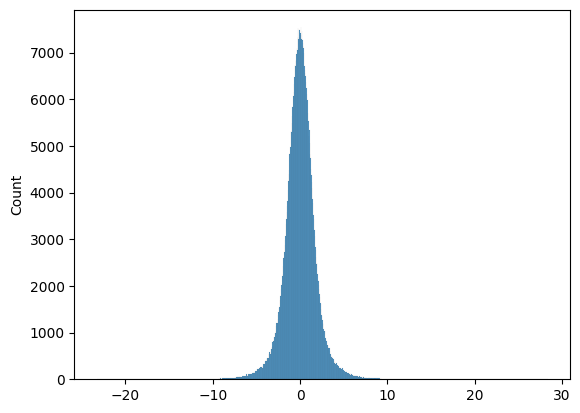

In [158]:
import seaborn as sns
fig,ax=plt.subplots()
sns.histplot(prior_samples['delta_Y'].flatten(),ax=ax)
#ax.set_xlim(-50,300)

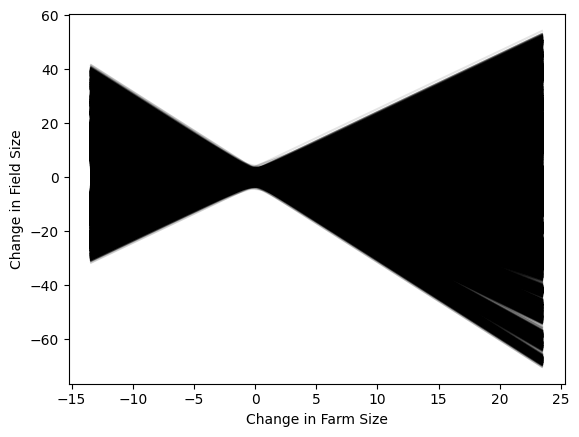

In [ ]:
N_lines = 100  # Number of prior predictive lines

fig, ax = plt.subplots()

# Generate x values for plotting
x = jnp.linspace(delta_X.min(), delta_X.max(), 101)

# Loop over random samples (instead of treating alpha_i as a single value)
for i in range(N_lines):
    for j in range(len(prior_samples['alpha_i'][i])):  # Iterate over entities
        ax.plot(x, prior_samples['alpha_i'][i][j] + prior_samples['beta'][i] * x, "k", alpha=0.1)

ax.set_xlabel("Change in Farm Size")
ax.set_ylabel("Change in Field Size")

plt.show()


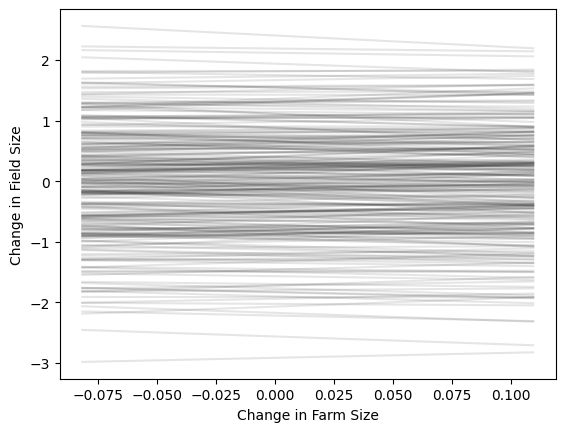

In [162]:
N_lines = 50  # Number of prior predictive lines
N_entities_to_plot = 5  # Choose a subset of entities

fig, ax = plt.subplots()

x = jnp.linspace(delta_X.min(), delta_X.max(), 101)
selected_entities = np.random.choice(len(prior_samples['alpha_i'][0]), N_entities_to_plot, replace=False)

for i in range(N_lines):  # Loop over prior samples
    for j in selected_entities:  # Only plot selected entities
        ax.plot(x, prior_samples['alpha_i'][i][j] + prior_samples['beta'][i] * x, "k", alpha=0.1)

ax.set_xlabel("Change in Farm Size")
ax.set_ylabel("Change in Field Size")
plt.show()

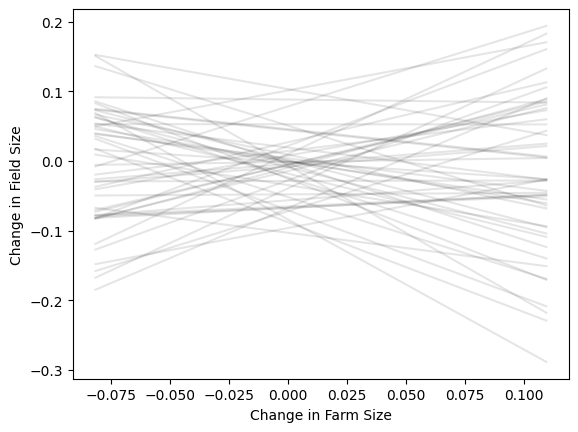

In [163]:
# Average Over Entities
fig, ax = plt.subplots()

x = jnp.linspace(delta_X.min(), delta_X.max(), 101)

for i in range(N_lines):
    alpha_mean = prior_samples['alpha_i'][i].mean()  # Compute the average entity effect
    ax.plot(x, alpha_mean + prior_samples['beta'][i] * x, "k", alpha=0.1)

ax.set_xlabel("Change in Farm Size")
ax.set_ylabel("Change in Field Size")
plt.show()


***
### STEP 3: GENERATE SYNTHETIC DATA
***

delta_Y.shape (5533,)


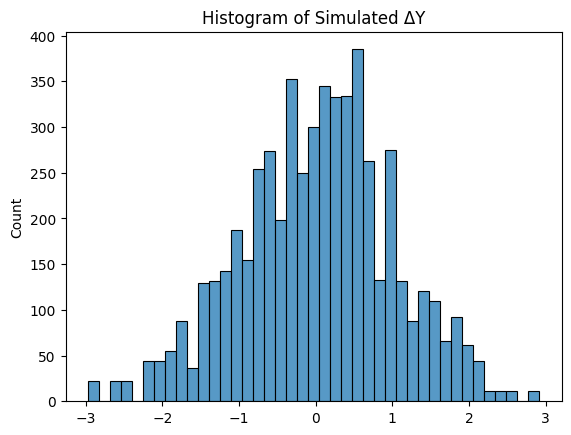

delta_Y.shape: (5533,)
delta_X.shape: (5533,)


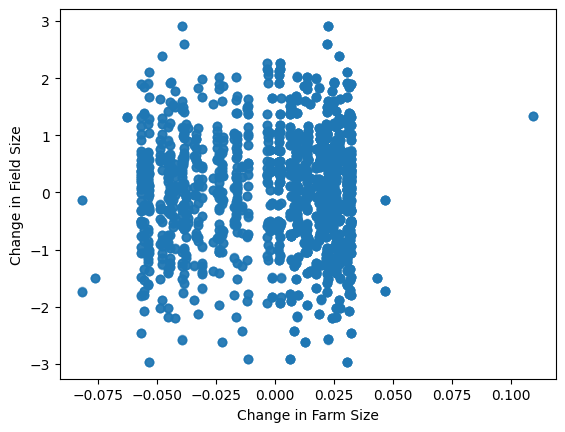

In [164]:
# Condition the model 
coefTrue = {
            # YOUR CODE HERE
            'alpha_i': jnp.array(np.random.normal(0, 1, num_entities)), 
            'beta': 0.05,
            'sigma': 0.001,
           }
# Use coefTrue to condition the model
condition_model = numpyro.handlers.condition(fieldsize, data=coefTrue)
# Generate synthetic data using conditioned model
conditioned_predictive = Predictive(condition_model, num_samples=1)
condition_samples = conditioned_predictive(rng_key_,delta_X=delta_X, entity=entity, num_entities=num_entities)
condition_samples

# Use the conditioned data to define the outcome variables 
delta_Y = condition_samples['delta_Y'][0]

print('delta_Y.shape',delta_Y.shape)

# Plot the generated data
fig,ax=plt.subplots()
sns.histplot(delta_Y.flatten(), ax=ax)
ax.set_title("Histogram of Simulated ΔY")
plt.show()

fig, ax = plt.subplots()
ax.scatter(delta_X, delta_Y, alpha=0.5)
ax.set_xlabel("Change in Farm Size")
ax.set_ylabel("Change in Field Size")


print(f"delta_Y.shape: {delta_Y.shape}")
print(f"delta_X.shape: {delta_X.shape}")

***
### STEP 4: FIT THE MODEL USING MCMC
first with above stated conditioning and then with real Y data
***

In [170]:
delta_Y_real = demeaned["Y_demeaned"].values

In [171]:
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(fieldsize)
mcmc = MCMC(kernel, num_samples=1000, num_warmup=1000, num_chains=1)
mcmc.run(rng_key_, delta_X=delta_X, entity=entity, delta_Y=delta_Y_real, num_entities=num_entities)

sample: 100%|██████████| 2000/2000 [00:03<00:00, 542.44it/s, 15 steps of size 3.33e-01. acc. prob=0.82]


***
### STEP 5: ANALYZE POSTERIOR DISTRIBUTIONS
***

In [172]:
azMCMC = az.from_numpyro(mcmc)
post_samples = mcmc.get_samples()
mcmc.print_summary()


                  mean       std    median      5.0%     95.0%     n_eff     r_hat
  alpha_i[0]      0.00      0.01      0.00     -0.02      0.02   2877.14      1.00
  alpha_i[1]      0.00      0.01      0.00     -0.02      0.02   3333.81      1.00
  alpha_i[2]     -0.00      0.01      0.00     -0.02      0.02   2834.86      1.00
  alpha_i[3]     -0.00      0.01     -0.00     -0.02      0.02   2464.58      1.00
  alpha_i[4]      0.00      0.01     -0.00     -0.02      0.02   2696.08      1.00
  alpha_i[5]      0.00      0.01      0.00     -0.02      0.02   3095.56      1.00
  alpha_i[6]      0.00      0.01      0.00     -0.02      0.02   2276.32      1.00
  alpha_i[7]     -0.00      0.01      0.00     -0.02      0.02   1938.66      1.00
  alpha_i[8]     -0.00      0.01     -0.00     -0.03      0.02   2837.72      1.00
  alpha_i[9]     -0.00      0.01     -0.00     -0.02      0.02   2734.40      1.00
 alpha_i[10]      0.00      0.01      0.00     -0.02      0.02   1821.41      1.00
 al

In [ ]:
# Print the shape of elements
for key, value in post_samples.items():
    print(f"Shape of {key}: {value.shape}")

Shape of alpha_i: (1000, 503)
Shape of beta: (1000,)
Shape of sigma: (1000,)


***
VISUALIZE
***

In [67]:
# Extract alpha_i summary (mean and std)
alpha_samples = post_samples["alpha_i"]  # shape (1000, 503)
alpha_means = alpha_samples.mean(axis=0)  # Compute mean for each alpha_i
alpha_stds = alpha_samples.std(axis=0)  # Compute std for each alpha_i
alpha_ci = np.percentile(alpha_samples, [2.5, 97.5], axis=0)

# Create DataFrame
df_alpha = pd.DataFrame({
    "entity_id": [f"alpha_{i}" for i in range(len(alpha_means))],  # Naming entities
    "CELLCODE": [entity_to_cellcode[i] for i in range(len(alpha_means))],  # Mapping to CELLCODE
    "mean": alpha_means,
    "std": alpha_stds,
    "ci": [f"({round(ci[0], 2)}, {round(ci[1], 2)})" for ci in alpha_ci.T]
})
'''
# Create histogram plot
plt.figure(figsize=(8, 5))
sns.histplot(df_alpha["mean"], bins=10, kde=True, color="blue")

# Labels and title
plt.xlabel("Mean of alpha_i")
plt.ylabel("Frequency")
plt.title("Histogram of Alpha Means")

# Show plot
plt.show()
'''

df_alpha.head(15)

,entity_id,CELLCODE,mean,std,ci
0,alpha_0,10kmE410N326,0.020733,0.693627,"(-1.35, 1.39)"
1,alpha_1,10kmE410N327,0.014654,0.660982,"(-1.31, 1.28)"
2,alpha_2,10kmE410N328,0.014141,0.654665,"(-1.33, 1.3)"
3,alpha_3,10kmE411N326,-0.003913,0.687855,"(-1.4, 1.26)"
4,alpha_4,10kmE411N327,-0.008353,0.690404,"(-1.38, 1.4)"
5,alpha_5,10kmE411N328,-0.015880,0.656473,"(-1.41, 1.26)"
6,alpha_6,10kmE412N324,0.010288,0.592765,"(-1.21, 1.25)"
7,alpha_7,10kmE412N325,0.009684,0.624024,"(-1.16, 1.25)"
8,alpha_8,10kmE412N326,0.009155,0.657681,"(-1.22, 1.29)"
9,alpha_9,10kmE412N327,-0.006414,0.647413,"(-1.32, 1.22)"


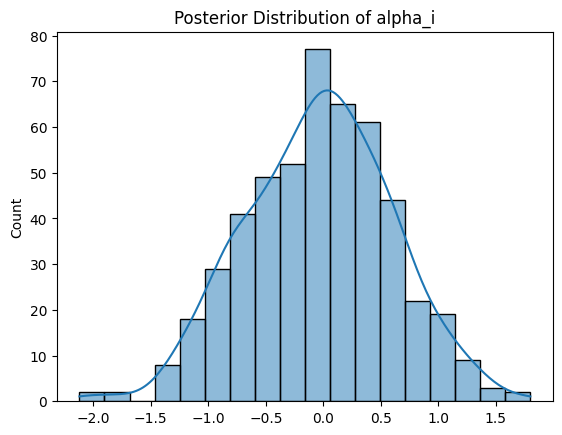

In [47]:
# extract alpha_i coefficients from mcmc samples
alpha_i_samples = post_samples["alpha_i"]

# put in df
alpha_i_samples = pd.DataFrame(alpha_i_samples[0])
alpha_i_samples.head()

# Plot the posterior distribution of alpha_i
fig, ax = plt.subplots()
sns.histplot(alpha_i_samples.values.flatten(), ax=ax, kde=True)
ax.set_title("Posterior Distribution of alpha_i")
plt.show()


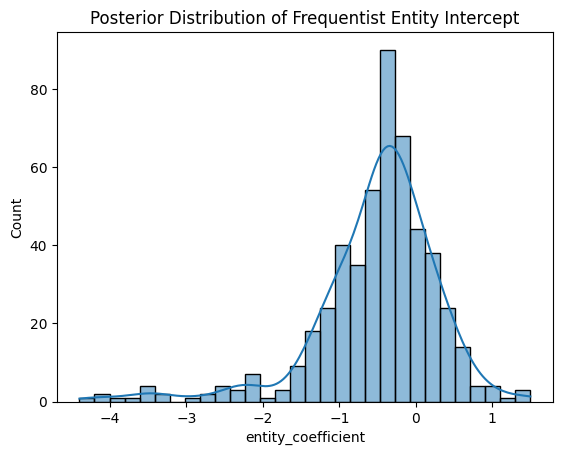

In [ ]:
# make similar histplot for entity_coefficient column of entity_effects df from classical fixed effects regression
fig, ax = plt.subplots()
sns.histplot(entity_effects["entity_coefficient"], ax=ax, kde=True)
ax.set_title("Posterior Distribution of Frequentist Entity Intercept")

plt.show()

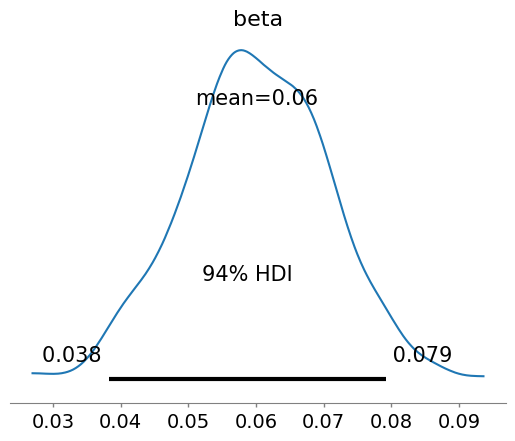

In [49]:
# Plot posterior distributions
az.plot_posterior(azMCMC, var_names=["beta"])
plt.show()

**Plot LANDKREIS color-coded dots of alpha_mean to see Regional distribution of intercepts**

In [69]:
# Select the 'CELLCODE' and 'LANDKREIS' columns from the farm_field DataFrame
farm_field_selected = farm_field[['CELLCODE', 'LANDKREIS']].drop_duplicates()

# Merge the selected columns with the entity_effects DataFrame on the 'CELLCODE' column
# entity_effectsl = pd.merge(entity_effects, farm_field_selected, on='CELLCODE', how='left')

#Merge the selected columns withe the df_alpha DataFrame on the 'CELLCODE' column
alpha_cells = pd.merge(df_alpha, farm_field_selected, on='CELLCODE', how='left')

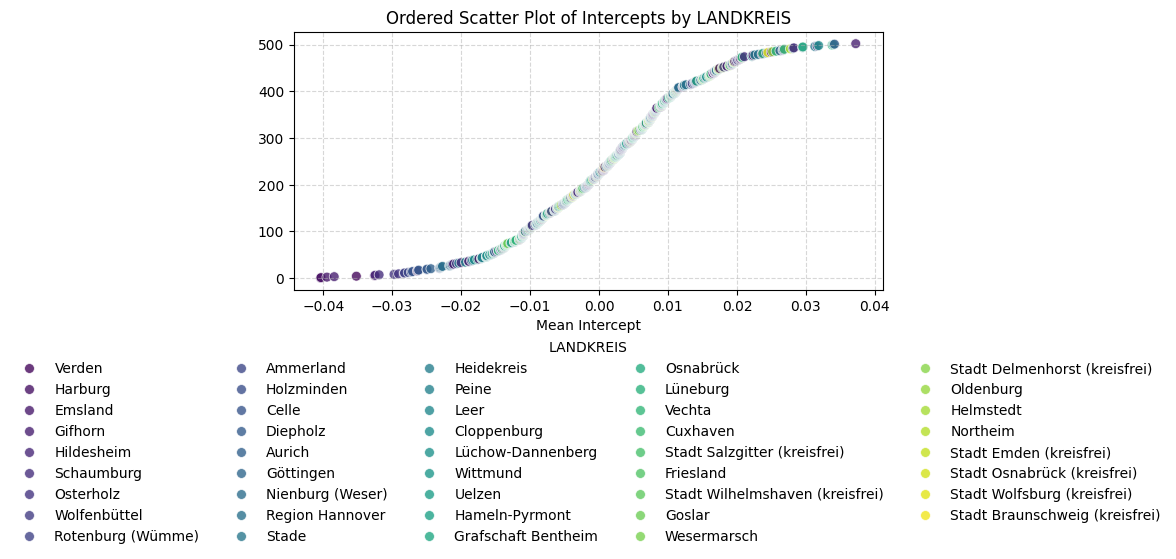

In [ ]:
# Sort by mean for better visualization
alpha_cells = alpha_cells.sort_values(by='mean')

# Create a simple scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=alpha_cells, 
    x='mean', 
    y=range(len(alpha_cells)),  # Just rank entities, no entity labels
    hue='LANDKREIS', 
    palette='viridis', 
    s=50,  # Make dots smaller
    alpha=0.8
)

plt.xlabel('Mean Intercept')
plt.ylabel('')  # Remove y-axis label
plt.title('Ordered Scatter Plot of Intercepts by LANDKREIS')

# Customize legend: Place it below the plot in 5 rows
plt.legend(
    title='LANDKREIS', 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15),  # Moves legend below the plot
    ncol=5,  # Arrange in 5 columns
    frameon=False  # Remove legend box
)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()  # Adjust layout to fit everything well

plt.show()


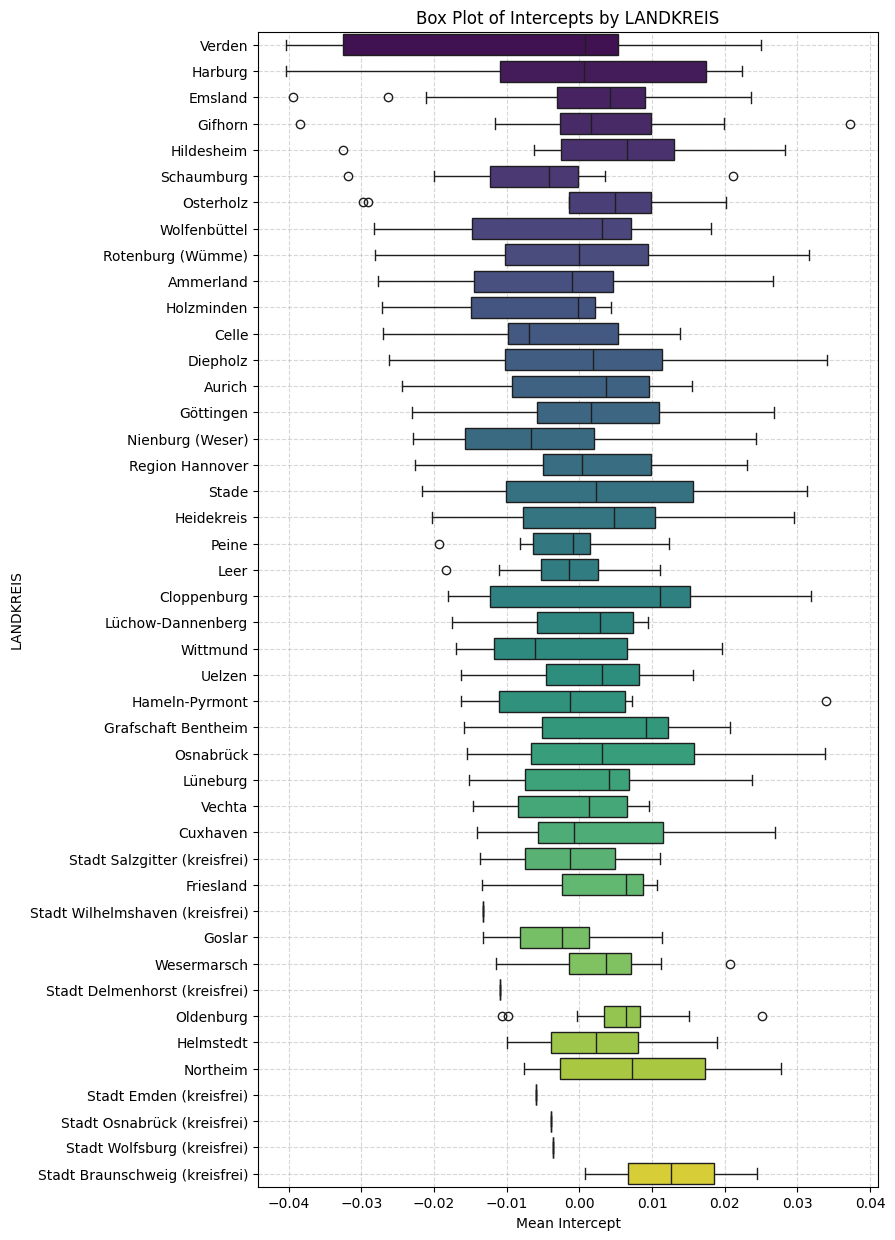

In [ ]:
plt.figure(figsize=(8, 15))
sns.boxplot(data=alpha_cells, x='mean', y='LANDKREIS', hue='LANDKREIS', dodge=False, palette='viridis')

plt.xlabel('Mean Intercept')
plt.ylabel('LANDKREIS')
plt.title('Box Plot of Intercepts by LANDKREIS')
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()
